In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [3]:
data=pd.read_csv('/content/ADANIPORTS (1).csv')

In [4]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3322 non-null   datetime64[ns]
 1   Symbol              3322 non-null   object        
 2   Series              3322 non-null   object        
 3   Prev Close          3322 non-null   float64       
 4   Open                3322 non-null   float64       
 5   High                3322 non-null   float64       
 6   Low                 3322 non-null   float64       
 7   Last                3322 non-null   float64       
 8   Close               3322 non-null   float64       
 9   VWAP                3322 non-null   float64       
 10  Volume              3322 non-null   int64         
 11  Turnover            3322 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  3322 non-null   int64       

In [5]:
data['Date']=pd.to_datetime(data['Date'])

In [6]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3322 non-null   datetime64[ns]
 1   Symbol              3322 non-null   object        
 2   Series              3322 non-null   object        
 3   Prev Close          3322 non-null   float64       
 4   Open                3322 non-null   float64       
 5   High                3322 non-null   float64       
 6   Low                 3322 non-null   float64       
 7   Last                3322 non-null   float64       
 8   Close               3322 non-null   float64       
 9   VWAP                3322 non-null   float64       
 10  Volume              3322 non-null   int64         
 11  Turnover            3322 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  3322 non-null   int64       

In [10]:
data.shape

(3322, 15)

In [11]:
data.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [14]:
data.drop('Trades',axis=1,inplace=True)

In [15]:
data.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [16]:
data.describe()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
count,3322,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,3.322000e+03,3322.000000
mean,2014-08-14 03:47:08.416616448,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,1.207441e+06,0.445899
min,2007-11-27 00:00:00,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,5.383000e+03,0.067000
25%,2011-04-07 06:00:00,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,3.212005e+05,0.332900
50%,2014-08-06 12:00:00,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,8.132775e+05,0.445650
75%,2017-12-18 18:00:00,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,1.605528e+06,0.555850
max,2021-04-30 00:00:00,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,2.241652e+07,0.979800
std,NaN,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,1.398640e+06,0.160496


<Axes: >

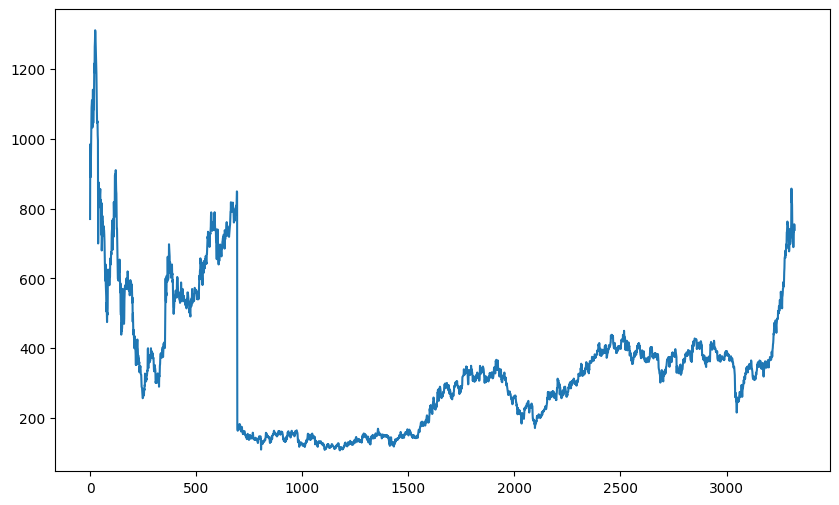

In [22]:
data['Open'].plot(figsize=(10,6))

In [23]:
X=data[['Open','High','Low','Volume']]
y=data['Close']

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [28]:
print(X.shape,X_train.shape,X_test.shape)

(3322, 4) (2657, 4) (665, 4)


In [29]:
lm=LinearRegression()

In [30]:
lm.fit(X_train,y_train)

LinearRegression()

In [33]:
lm.coef_

array([-5.05275255e-01,  7.23815759e-01,  7.78824008e-01,  6.78816255e-08])

In [34]:
lm.intercept_

0.7620258840636893

In [36]:
pred=lm.predict(X_test)

In [39]:
print(pred)

[ 330.79932952  132.48853501  593.4489691   151.92501394  145.45039181
  355.06120302  404.57531102  332.09401571  393.64817777  109.07558904
  500.73732689  731.35265151  335.54499881  584.65164324  335.37932069
  126.92596261  156.46391753  342.1737801   145.7915386   529.59144205
  167.30152107  306.98412481  147.91908327  213.61288426  296.87249759
  673.43233522  133.92519216  262.76942501  205.78309086  768.00073096
  153.97549379  139.28106741  425.08820683  403.87060336  384.14569873
  324.53557719  112.91440629  148.6989892   741.46865723  326.89817917
  166.26748032  441.9212667  1222.15459242  221.23464351  383.01137878
  392.44493452  821.3919724   353.11524393  858.02719494  263.12921101
  369.51976646  371.6316254   308.75123813  328.44123085  147.24484345
  347.56004335  342.39565672  155.34150444  136.38289333  147.22096337
  399.98918647  568.18391652  149.95643071  546.78214483  160.52542961
  324.86530428  546.77998374  322.09766448  337.60749672  149.22735243
  790.

In [59]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df

,Actual,Predicted
1895,331.35,330.799330
814,131.35,132.488535
175,591.00,593.448969
1518,149.55,151.925014
1341,144.85,145.450392
...,...,...
345,405.30,403.487025
2485,391.75,386.996572
177,614.75,621.364112
3164,341.60,340.928730


<Axes: >

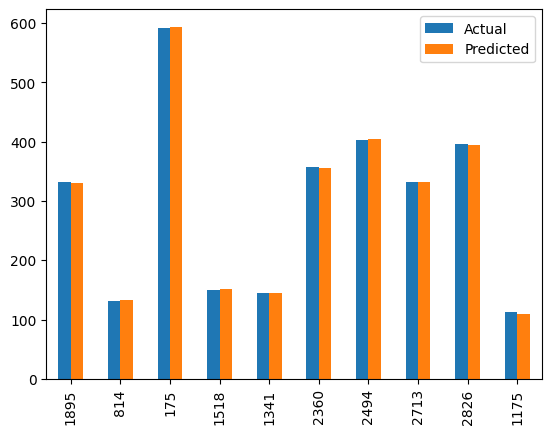

In [57]:
graph=df.head(10)
graph.plot(kind='bar')

In [43]:
print(y_test.dtype)
print(pred.dtype)

float64
float64


In [49]:
mse=mean_squared_error(y_test,pred)
mse

32.995418353930454

In [51]:
mae=mean_absolute_error(y_test,pred)
mae

2.978085613360397

In [58]:
r2=r2_score(y_test,pred)
r2

0.9991414939950964